In [1]:
import pandas as pd 
import numpy as np 
import geopandas as gpd

In [2]:
# data about demographics spatially

dem = gpd.read_file("data/ruimtelijkekengetallen2020.json")

In [3]:
dem

,code,std_koppel,std_id_s,std_id_i,wk_koppel,wk_id_s,wk_id_i,brt_koppel,brt_id_s,brt_id_i,...,nwp8,nwp9,nwp10,nwp11,nwp12,nwp13,nwp14,partauto,partmotor,geometry
0,1,04 Scheveningen,04,4,07 Scheveningen,07,7,01 Oud Scheveningen,01,1,...,36,16,32,39,46,132,115,969,93,"POLYGON ((78223.220 457985.570, 78291.150 4579..."
1,2,04 Scheveningen,04,4,07 Scheveningen,07,7,02 Vissershaven,02,2,...,494,98,67,11,314,353,203,1459,120,"POLYGON ((77191.010 457958.840, 77294.730 4575..."
2,3,04 Scheveningen,04,4,07 Scheveningen,07,7,03 Scheveningen Badplaats,03,3,...,55,20,98,214,775,212,98,1871,171,"POLYGON ((78464.480 458272.310, 78521.460 4582..."
3,4,04 Scheveningen,04,4,07 Scheveningen,07,7,04 Visserijbuurt,04,4,...,38,21,147,124,110,102,563,1136,77,"POLYGON ((78822.640 457973.170, 78822.880 4579..."
4,5,04 Scheveningen,04,4,06 Van Stolkpark en Schev. Bos,06,6,05 v Stolkpark/Schev Bosjes,05,5,...,10,1,85,156,211,143,191,301,12,"POLYGON ((79210.100 457434.190, 79212.900 4574..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,110,08 Leidschenveen-Ypenburg,08,8,43 Forepark,43,43,117 De Rivieren,117,117,...,3028,348,22,132,136,5204,48,15,18,"POLYGON ((85568.270 453048.700, 85574.820 4530..."
110,111,08 Leidschenveen-Ypenburg,08,8,44 Leidschenveen,44,44,118 De Lanen,118,118,...,39,5,386,0,19,102,54,2074,137,"POLYGON ((86465.740 453028.100, 86717.670 4527..."
111,112,08 Leidschenveen-Ypenburg,08,8,44 Leidschenveen,44,44,119 De Velden,119,119,...,39,4,256,1080,42,108,107,1755,145,"POLYGON ((87026.310 453751.370, 87470.800 4532..."
112,113,08 Leidschenveen-Ypenburg,08,8,44 Leidschenveen,44,44,120 De Vissen,120,120,...,72,14,123,0,22,187,534,3619,282,"POLYGON ((87471.780 453223.610, 87563.290 4531..."


In [7]:
# List which data is included. 
dem.columns

Index(['code', 'std_koppel', 'std_id_s', 'std_id_i', 'wk_koppel', 'wk_id_s',
       'wk_id_i', 'brt_koppel', 'brt_id_s', 'brt_id_i', 'brt_naam', 'wk_naam',
       'std_naam', 'opp_in_m2', 'aantbev', 'lft019', 'lft2064', 'lft65_',
       'geslm', 'geslv', 'etnicbs8', 'etnicbs9', 'aantgeb', 'aantstrf',
       'natloop', 'vesttot', 'vertrtot', 'saldveve', 'bevsaldo', 'aanthh',
       'ephh', 'mphhzk', 'mphhmk', 'eenoud', 'srwon1', 'srwon2', 'srwon3',
       'srwon4', 'srwon5', 'srwon6', 'srwon7', 'srwon8', 'srwon9', 'srwon10',
       'srwon11', 'srwon12', 'srwon13', 'eigend1', 'eigend3', 'eigend2',
       'eigend4', 'aantozb', 'bvowon', 'ttprs', 'anietwon', 'akantoor',
       'awinkels', 'abedrijf', 'ahoreca', 'ahotels', 'auitgaan', 'acultuur',
       'aattractie', 'asport', 'arecreat', 'amedisch', 'abijzond', 'ascholen',
       'akerken', 'abijzwon', 'aoverig', 'vesttotaal', 'wptotaal', 'potberoep',
       'nwp1', 'nwp2', 'nwp3', 'nwp4', 'nwp5', 'nwp6', 'nwp7', 'nwp8', 'nwp9',
       'nw

In [22]:
Selection = dem[['code', 'brt_naam', 'geslm', 'geslv', 'lft019', 'lft2064', 'lft65_', 'geometry']]
Selection

,code,brt_naam,geslm,geslv,lft019,lft2064,lft65_,geometry
0,1,Oud Scheveningen,1479,1483,534,1876,552,"POLYGON ((78223.220 457985.570, 78291.150 4579..."
1,2,Vissershaven,2021,2142,810,2491,862,"POLYGON ((77191.010 457958.840, 77294.730 4575..."
2,3,Scheveningen Badplaats,2768,2826,1033,3625,936,"POLYGON ((78464.480 458272.310, 78521.460 4582..."
3,4,Visserijbuurt,1832,2084,770,2297,849,"POLYGON ((78822.640 457973.170, 78822.880 4579..."
4,5,v Stolkpark/Schev Bosjes,356,390,174,368,204,"POLYGON ((79210.100 457434.190, 79212.900 4574..."
...,...,...,...,...,...,...,...,...
109,110,De Rivieren,15,11,x,20,x,"POLYGON ((85568.270 453048.700, 85574.820 4530..."
110,111,De Lanen,2760,2713,1914,3284,275,"POLYGON ((86465.740 453028.100, 86717.670 4527..."
111,112,De Velden,2109,2058,1141,2556,470,"POLYGON ((87026.310 453751.370, 87470.800 4532..."
112,113,De Vissen,4209,4289,2316,5105,1077,"POLYGON ((87471.780 453223.610, 87563.290 4531..."


In [26]:
X = Selection.replace('x', np.nan)
X['lft019'] = X['lft019'].astype(float)

<AxesSubplot:>

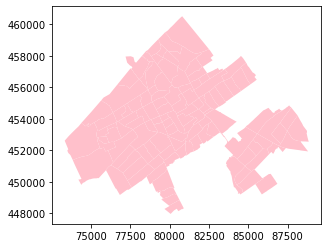

In [40]:
X[['lft019', 'geometry']].plot(color='pink')

In [46]:
X[['lft019', 'brt_naam']].sort_values(by = 'lft019', ascending=False).head(10)

,lft019,brt_naam
14,3863.0,Schildersbuurt-West
94,3104.0,Hoge Veld
90,2972.0,Dreven en Gaarden
78,2861.0,Houtwijk
76,2850.0,Leyenburg
15,2782.0,Schildersbuurt-Noord
24,2452.0,Laakkwartier-Oost
79,2413.0,Venen/Oorden/Raden
6,2382.0,Statenkwartier
112,2316.0,De Vissen
